In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

        u1_sum    u1_mean     u1_std     u2_sum    u2_mean     u2_std
0    15590.612  15.590612  14.815762  13435.370  13.435370  17.944497
1    15181.212  15.181212  14.745843  13699.345  13.699345  17.858214
2    15760.024  15.760024  14.857806  13775.865  13.775865  18.174172
3    16203.952  16.203952  14.735574  12671.340  12.671340  17.660577
4    15178.296  15.178296  14.893453  14522.735  14.522735  18.491464
..         ...        ...        ...        ...        ...        ...
995  16429.924  16.429924  14.835656  12988.510  12.988510  17.950457
996  15786.172  15.786172  14.903079  13732.735  13.732735  18.202352
997  15716.900  15.716900  14.919655  14017.205  14.017205  18.217464
998  14998.740  14.998740  14.605582  14224.575  14.224575  18.076613
999  15343.868  15.343868  15.016020  13890.890  13.890890  18.094307

[1000 rows x 6 columns]
u1 mean 15354.422296
u1 std 471.7361386514012
u2 mean 13909.55564
u2 std 572.616103319424
t-test TtestResult(statistic=61.5855769264245

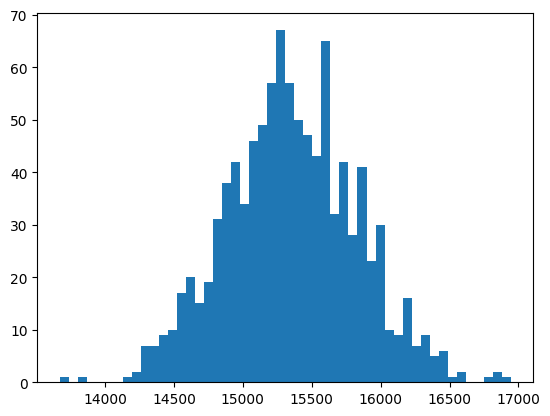

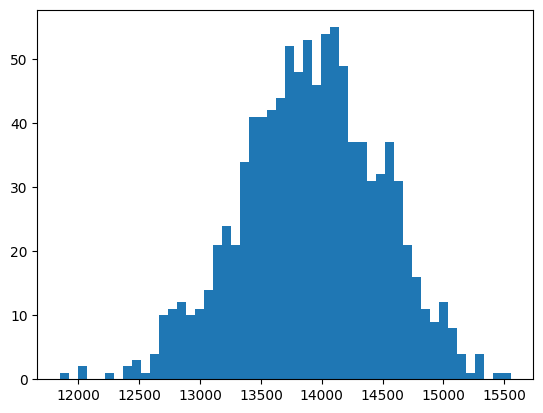

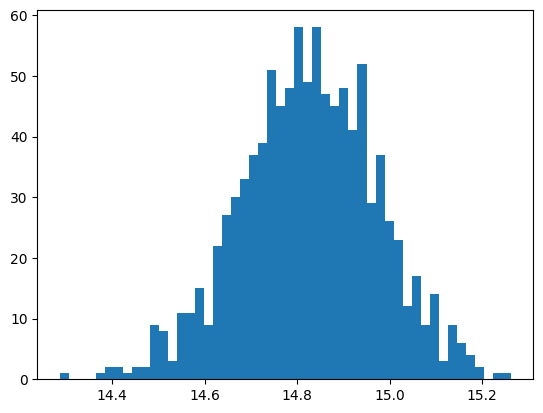

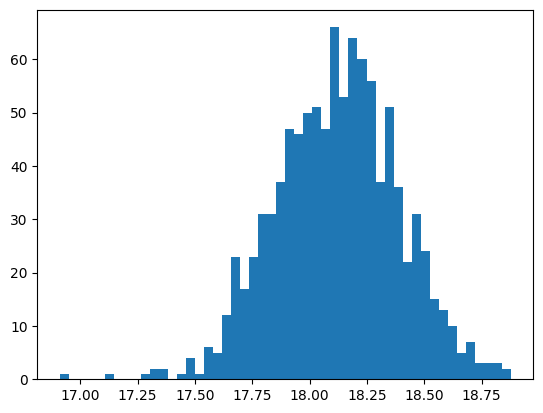

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Initialize lists to store the sums of u1 and u2
u1_sums = []
u2_sums = []
u1_stds = []
u2_stds = []
u1_means = []
u2_means = []


# Run the simulation 1000 times
for _ in range(1000):
    # Generate new theta values
    theta1 = stats.uniform.rvs(0, 100, size=1000)
    theta1 = np.round(theta1, 2)

    theta2 = stats.uniform.rvs(0, 100, size=1000)
    theta2 = np.round(theta2, 2)

    # Calculate bids
    bid1 = theta1 * 0.6
    bid2 = theta2 * 0.5

    # Create DataFrame for this iteration
    df = pd.DataFrame({'theta1': theta1, 'theta2': theta2, 'bid1': bid1, 'bid2': bid2})
    df['bid_diff'] = bid1 - bid2

    # Calculate u1 and u2 based on bid_diff conditions
    df['u1'] = np.where(df['bid_diff'] >= 0, theta1 - bid1, 0)
    df['u2'] = np.where(df['bid_diff'] < 0, theta2 - bid2, 0)

    # Append the sums of u1 and u2 to the lists
    u1_sums.append(df["u1"].sum())
    u2_sums.append(df["u2"].sum())
    u1_stds.append(df["u1"].std())
    u2_stds.append(df["u2"].std())
    u1_means.append(df["u1"].mean())
    u2_means.append(df["u2"].mean())
# Store results in a DataFrame
simulation_results = pd.DataFrame({'u1_sum': u1_sums,'u1_mean': u1_means,'u1_std': u1_stds, 'u2_sum': u2_sums,'u2_mean': u2_means,'u2_std': u2_stds})

# Display the first few rows of the results
print(simulation_results)


print("u1 mean",simulation_results['u1_sum'].mean())
print("u1 std",simulation_results['u1_sum'].std())

print("u2 mean",simulation_results['u2_sum'].mean())
print("u2 std",simulation_results['u2_sum'].std())

print("t-test",stats.ttest_ind(simulation_results['u1_sum'],simulation_results['u2_sum']))

plt.hist(simulation_results['u1_sum'],bins=50)
plt.show()

plt.hist(simulation_results['u2_sum'],bins=50)
plt.show()

plt.hist(simulation_results['u1_std'],bins=50)
plt.show()

plt.hist(simulation_results['u2_std'],bins=50)
plt.show()





In [ ]:
df

,theta1,theta2,bid1,bid2,bid_diff,u1,u2
0,12.64,67.68,7.584,33.840,-26.256,0.000,33.840
1,36.32,66.40,21.792,33.200,-11.408,0.000,33.200
2,71.92,19.67,43.152,9.835,33.317,28.768,0.000
3,66.29,41.90,39.774,20.950,18.824,26.516,0.000
4,31.83,16.69,19.098,8.345,10.753,12.732,0.000
...,...,...,...,...,...,...,...
995,15.48,57.84,9.288,28.920,-19.632,0.000,28.920
996,20.04,6.57,12.024,3.285,8.739,8.016,0.000
997,90.30,97.39,54.180,48.695,5.485,36.120,0.000
998,39.99,66.39,23.994,33.195,-9.201,0.000,33.195


     u1_sum    u2_sum    u3_sum    u4_sum    u5_sum   u1_mean   u2_mean  \
0  3011.858  3603.294  3470.456  3276.806  3424.808  3.011858  3.603294   
1  3289.662  3286.570  3546.512  3033.806  3583.202  3.289662  3.286570   
2  3343.000  3339.920  3473.618  3127.864  3278.376  3.343000  3.339920   
3  3935.438  3155.948  3230.304  3019.026  3381.924  3.935438  3.155948   
4  3238.244  3234.574  3146.964  3682.310  3437.346  3.238244  3.234574   

    u3_mean   u4_mean   u5_mean    u1_std    u2_std    u3_std    u4_std  \
0  3.470456  3.276806  3.424808  6.530207  6.993000  6.931700  6.716485   
1  3.546512  3.033806  3.583202  6.725648  6.820571  6.914587  6.590864   
2  3.473618  3.127864  3.278376  6.755722  6.750978  6.890590  6.595647   
3  3.230304  3.019026  3.381924  7.224624  6.691253  6.751180  6.487882   
4  3.146964  3.682310  3.437346  6.717905  6.708791  6.644170  7.112909   

     u5_std  
0  6.943062  
1  6.985667  
2  6.712819  
3  6.814264  
4  6.843763  
Agent 1 - Util

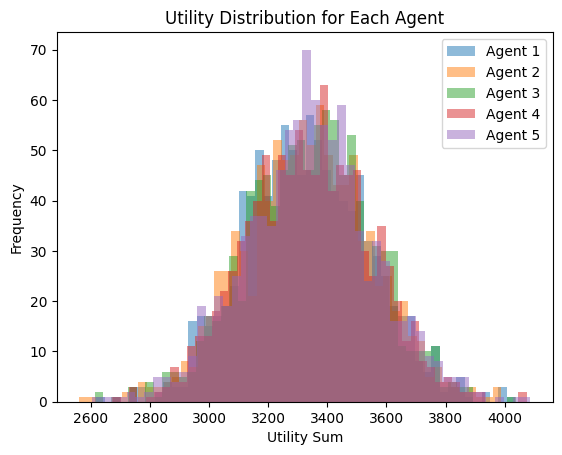

T-test between Agent 1 and Agent 2: t-stat = -0.06770997349652878, p-value = 0.95
T-test between Agent 1 and Agent 3: t-stat = -0.8244480925757792, p-value = 0.41
T-test between Agent 1 and Agent 4: t-stat = -0.8634304804003927, p-value = 0.39
T-test between Agent 1 and Agent 5: t-stat = -1.0522419448676648, p-value = 0.29
T-test between Agent 2 and Agent 3: t-stat = -0.7480985820577896, p-value = 0.45
T-test between Agent 2 and Agent 4: t-stat = -0.7869456549958541, p-value = 0.43
T-test between Agent 2 and Agent 5: t-stat = -0.9753219505410603, p-value = 0.33
T-test between Agent 3 and Agent 4: t-stat = -0.04174344503576024, p-value = 0.97
T-test between Agent 3 and Agent 5: t-stat = -0.24537014551058314, p-value = 0.81
T-test between Agent 4 and Agent 5: t-stat = -0.2037224754462285, p-value = 0.84


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Parameters
n_agents = 5  # Number of agents
n_simulations = 1000  # Number of simulations
theta_max = 100  # Maximum value for theta

# Define bidding strategies for each agent (customizable)
# For example, Agent 1 bids 0.5 * theta, Agent 2 bids 0.6 * theta, etc.
bidding_strategies = [0.8, 0.8, 0.8, 0.8, 0.8]  # Define your custom strategies here

# Initialize lists to store results
utility_sums = {f'u{i}_sum': [] for i in range(1, n_agents + 1)}
utility_means = {f'u{i}_mean': [] for i in range(1, n_agents + 1)}
utility_stds = {f'u{i}_std': [] for i in range(1, n_agents + 1)}

# Run the simulation multiple times
for _ in range(n_simulations):
    # Generate new theta values for each agent
    thetas = [np.round(stats.uniform.rvs(0, theta_max, size=1000), 2) for _ in range(n_agents)]

    # Calculate bids based on each agent's custom bidding strategy
    bids = [theta * bidding_strategies[i] for i, theta in enumerate(thetas)]

    # Create DataFrame for this iteration
    df = pd.DataFrame({f'theta{i+1}': thetas[i] for i in range(n_agents)})
    for i in range(n_agents):
        df[f'bid{i+1}'] = bids[i]

    # Determine the winning bid and calculate utilities
    max_bid = df[[f'bid{i+1}' for i in range(n_agents)]].max(axis=1)
    for i in range(n_agents):
        df[f'u{i+1}'] = np.where(df[f'bid{i+1}'] == max_bid, df[f'theta{i+1}'] - df[f'bid{i+1}'], 0)

    # Append sums, means, and stds of utilities for each agent
    for i in range(n_agents):
        utility_sums[f'u{i+1}_sum'].append(df[f'u{i+1}'].sum())
        utility_means[f'u{i+1}_mean'].append(df[f'u{i+1}'].mean())
        utility_stds[f'u{i+1}_std'].append(df[f'u{i+1}'].std())

# Store results in a DataFrame
simulation_results = pd.DataFrame({**utility_sums, **utility_means, **utility_stds})

# Display the first few rows of the results
print(simulation_results.head())

# Summary statistics
for i in range(n_agents):
    print(f"Agent {i+1} - Utility Mean:", simulation_results[f'u{i+1}_sum'].mean())
    print(f"Agent {i+1} - Utility Std Dev:", simulation_results[f'u{i+1}_sum'].std())

# Plot histograms for utility sums of each agent
for i in range(n_agents):
    plt.hist(simulation_results[f'u{i+1}_sum'], bins=50, alpha=0.5, label=f'Agent {i+1}')
plt.legend()
plt.title("Utility Distribution for Each Agent")
plt.xlabel("Utility Sum")
plt.ylabel("Frequency")
plt.show()

# Perform pairwise t-tests between agents
for i in range(n_agents):
    for j in range(i+1, n_agents):
        t_stat, p_val = stats.ttest_ind(simulation_results[f'u{i+1}_sum'], simulation_results[f'u{j+1}_sum'])
        print(f"T-test between Agent {i+1} and Agent {j+1}: t-stat = {t_stat}, p-value = {round(p_val,2)}")


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [ ]:
# Application for finding best strategy / did not work

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Parameters
n_agents = 5  # Number of agents
n_simulations = 1  # Number of simulations per check
theta_max = 100  # Maximum value for theta
n_auctions = 1000  # Number of auctions per simulation
iterations = 1000  # Number of times to repeat the adjustment process

# Initial bidding strategies
theta1 = 0.1
theta2 = 0.1
theta3 = 0.1
theta4 = 0.1
theta5 = 0.1
bidding_strategies = [theta1, theta2, theta3, theta4, theta5]

# Function to calculate utilities for a single simulation run
def run_simulation(bidding_strategies):
    thetas = [np.round(stats.uniform.rvs(50, 15, size=n_auctions), 2) for _ in range(n_agents)]
    bids = [theta * bidding_strategies[i] for i, theta in enumerate(thetas)]

    df = pd.DataFrame({f'theta{i+1}': thetas[i] for i in range(n_agents)})
    for i in range(n_agents):
        df[f'bid{i+1}'] = bids[i]

    max_bid = df[[f'bid{i+1}' for i in range(n_agents)]].max(axis=1)
    utilities = []
    for i in range(n_agents):
        df[f'u{i+1}'] = np.where(df[f'bid{i+1}'] == max_bid, df[f'theta{i+1}'] - df[f'bid{i+1}'], 0)
        utilities.append(df[f'u{i+1}'].sum())
    return utilities

# Repeat the process for the specified number of iterations
for iteration in range(iterations):
    print(f"Iteration {iteration + 1}")

    # ---------------------------- Agent 1
    before_change = run_simulation(bidding_strategies)[0]  # Utility for Agent 1

    theta1 += 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]
    after_change = run_simulation(bidding_strategies)[0]

    if before_change < after_change:
        before_change = after_change
    else:
        theta1 -= 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]

    # Double-check by decreasing
    theta1 -= 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]
    after_double_check = run_simulation(bidding_strategies)[0]

    if before_change < after_double_check:
        before_change = after_double_check
    else:
        theta1 += 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]

    # ---------------------------- Agent 2
    before_change = run_simulation(bidding_strategies)[1]

    theta2 += 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]
    after_change = run_simulation(bidding_strategies)[1]

    if before_change < after_change:
        before_change = after_change
    else:
        theta2 -= 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]

    # Double-check by decreasing
    theta2 -= 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]
    after_double_check = run_simulation(bidding_strategies)[1]

    if before_change < after_double_check:
        before_change = after_double_check
    else:
        theta2 += 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]

    # ---------------------------- Agent 3
    before_change = run_simulation(bidding_strategies)[2]

    theta3 += 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]
    after_change = run_simulation(bidding_strategies)[2]

    if before_change < after_change:
        before_change = after_change
    else:
        theta3 -= 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]

    # Double-check by decreasing
    theta3 -= 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]
    after_double_check = run_simulation(bidding_strategies)[2]

    if before_change < after_double_check:
        before_change = after_double_check
    else:
        theta3 += 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]

    # ---------------------------- Agent 4
    before_change = run_simulation(bidding_strategies)[3]

    theta4 += 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]
    after_change = run_simulation(bidding_strategies)[3]

    if before_change < after_change:
        before_change = after_change
    else:
        theta4 -= 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]

    # Double-check by decreasing
    theta4 -= 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]
    after_double_check = run_simulation(bidding_strategies)[3]

    if before_change < after_double_check:
        before_change = after_double_check
    else:
        theta4 += 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]

    # ---------------------------- Agent 5
    before_change = run_simulation(bidding_strategies)[4]

    theta5 += 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]
    after_change = run_simulation(bidding_strategies)[4]

    if before_change < after_change:
        before_change = after_change
    else:
        theta5 -= 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]

    # Double-check by decreasing
    theta5 -= 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]
    after_double_check = run_simulation(bidding_strategies)[4]

    if before_change < after_double_check:
        before_change = after_double_check
    else:
        theta5 += 0.01
    bidding_strategies = [theta1, theta2, theta3, theta4, theta5]

    # Print strategies after each iteration
    print(f"Strategies after Iteration {iteration + 1}:")
    print(f"Agent 1: {theta1}, Agent 2: {theta2}, Agent 3: {theta3}, Agent 4: {theta4}, Agent 5: {theta5}")
    print("-" * 40)

# Display final theta values for all agents after 1000 iterations
print("\nFinal bidding strategies:")
print("Agent 1:", theta1)
print("Agent 2:", theta2)
print("Agent 3:", theta3)
print("Agent 4:", theta4)
print("Agent 5:", theta5)


Iteration 1
Strategies after Iteration 1:
Agent 1: 0.11, Agent 2: 0.11, Agent 3: 0.11, Agent 4: 0.11, Agent 5: 0.11
----------------------------------------
Iteration 2
Strategies after Iteration 2:
Agent 1: 0.12, Agent 2: 0.12, Agent 3: 0.12, Agent 4: 0.12, Agent 5: 0.12
----------------------------------------
Iteration 3
Strategies after Iteration 3:
Agent 1: 0.13, Agent 2: 0.13, Agent 3: 0.13, Agent 4: 0.13, Agent 5: 0.13
----------------------------------------
Iteration 4
Strategies after Iteration 4:
Agent 1: 0.14, Agent 2: 0.14, Agent 3: 0.14, Agent 4: 0.14, Agent 5: 0.14
----------------------------------------
Iteration 5
Strategies after Iteration 5:
Agent 1: 0.15000000000000002, Agent 2: 0.15000000000000002, Agent 3: 0.15000000000000002, Agent 4: 0.15000000000000002, Agent 5: 0.15000000000000002
----------------------------------------
Iteration 6
Strategies after Iteration 6:
Agent 1: 0.16000000000000003, Agent 2: 0.16000000000000003, Agent 3: 0.16000000000000003, Agent 4:

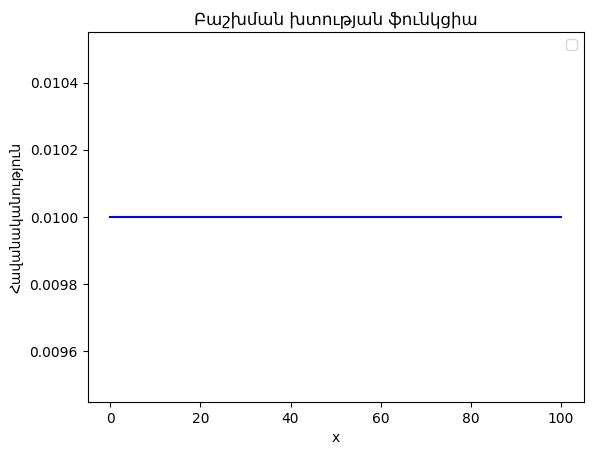

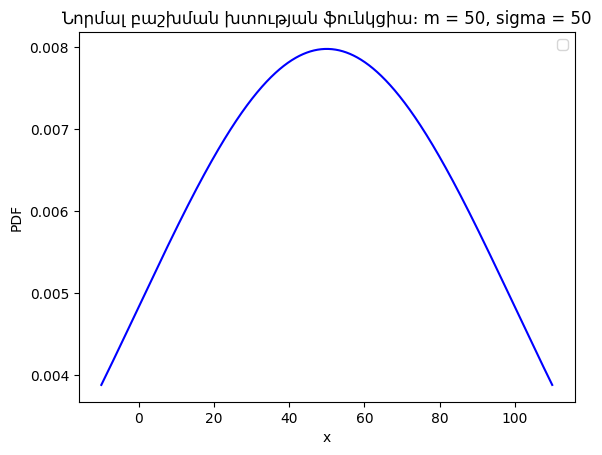

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Define the parameters for the uniform distribution
a = 0  # Start of the interval
b = 100  # End of the interval

# Generate x values
x = np.linspace(a, b, 1000)

# Calculate the PDF of the uniform distribution
pdf = uniform.pdf(x, loc=a, scale=b-a)

# Plot the PDF
plt.plot(x, pdf, color="blue")
plt.title("Բաշխման խտության ֆունկցիա")
plt.xlabel("x")
plt.ylabel("Հավանականություն")
plt.legend()
plt.show()


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters for the normal distribution
mean = 50  # Center the distribution at the middle of the range
std_dev = 50  # Standard deviation to cover the 0-100 range

# Generate x values (we'll use a range slightly outside of 0-100 to see the curve tail)
x = np.linspace(-10, 110, 1000)

# Calculate the PDF of the normal distribution
pdf = norm.pdf(x, loc=mean, scale=std_dev)

# Plot the PDF
plt.plot(x, pdf, color="blue")
plt.title("Նորմալ բաշխման խտության ֆունկցիա։ m = 50, sigma = 50")
plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()

plt.show()

     u1_sum    u2_sum    u3_sum    u4_sum    u5_sum   u1_mean   u2_mean  \
0  5003.931  5090.724  5305.926  5170.476  4551.699  5.003931  5.090724   
1  5356.674  4740.318  4940.634  5059.518  4989.528  5.356674  4.740318   
2  4969.464  5435.628  4714.989  4687.578  5257.089  4.969464  5.435628   
3  5149.236  5017.866  5256.120  5161.596  4378.149  5.149236  5.017866   
4  4800.429  5439.639  4464.108  4948.770  5383.233  4.800429  5.439639   

    u3_mean   u4_mean   u5_mean     u1_std     u2_std     u3_std     u4_std  \
0  5.305926  5.170476  4.551699  10.151075  10.318104  10.462291  10.314157   
1  4.940634  5.059518  4.989528  10.440520  10.016048  10.175447  10.207904   
2  4.714989  4.687578  5.257089  10.128126  10.493907  10.001776   9.979610   
3  5.256120  5.161596  4.378149  10.339006  10.216344  10.308206  10.270559   
4  4.464108  4.948770  5.383233  10.120678  10.437090   9.667405  10.173172   

      u5_std  seller_mean_utility_per_round  
0   9.878563                

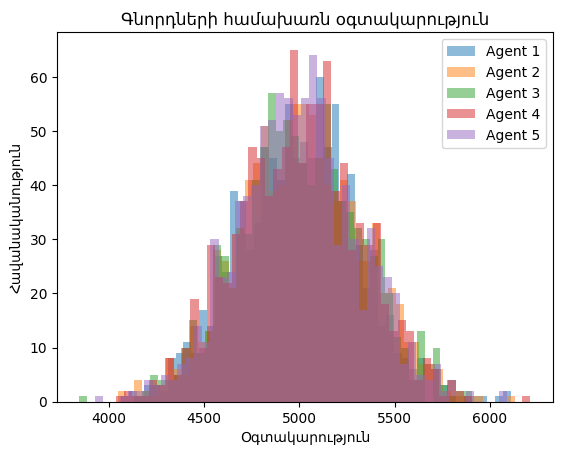

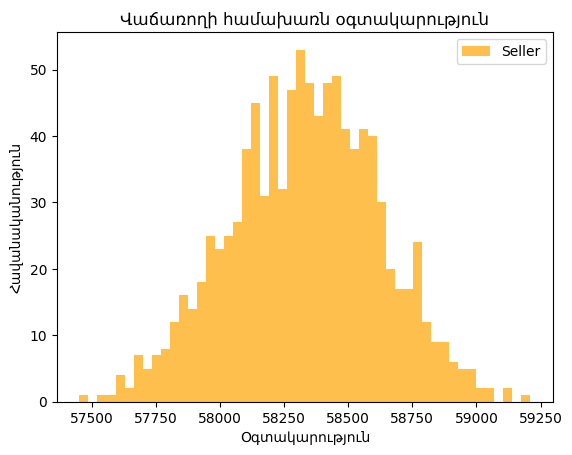

T-test between Agent 1 and Agent 2: t-stat = -0.9284762446580774, p-value = 0.35
T-test between Agent 1 and Agent 3: t-stat = -0.456871749247003, p-value = 0.65
T-test between Agent 1 and Agent 4: t-stat = -0.11658858470780398, p-value = 0.91
T-test between Agent 1 and Agent 5: t-stat = 0.40720168933943196, p-value = 0.68
T-test between Agent 2 and Agent 3: t-stat = 0.4797499782642933, p-value = 0.63
T-test between Agent 2 and Agent 4: t-stat = 0.8128315930393871, p-value = 0.42
T-test between Agent 2 and Agent 5: t-stat = 1.3452841848547348, p-value = 0.18
T-test between Agent 3 and Agent 4: t-stat = 0.339723443683739, p-value = 0.73
T-test between Agent 3 and Agent 5: t-stat = 0.8726226983876934, p-value = 0.38
T-test between Agent 4 and Agent 5: t-stat = 0.5254408595259008, p-value = 0.6


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Parameters
n_agents = 5  # Number of agents
n_simulations = 1000  # Number of simulations
theta_max = 100  # Maximum value for theta

# Define bidding strategies for each agent
bidding_strategies = [0.7, 0.7, 0.7, 0.7, 0.7]  # Define your custom strategies here

# Initialize lists to store results
utility_sums = {f'u{i}_sum': [] for i in range(1, n_agents + 1)}
utility_means = {f'u{i}_mean': [] for i in range(1, n_agents + 1)}
utility_stds = {f'u{i}_std': [] for i in range(1, n_agents + 1)}
seller_mean_per_round = []

# Run the simulation multiple times
for _ in range(n_simulations):
    # Generate new theta values for each agent
    thetas = [np.round(stats.uniform.rvs(0, 100, size=1000), 2) for _ in range(n_agents)]

    # Calculate bids based on each agent's custom bidding strategy
    bids = [theta * bidding_strategies[i] for i, theta in enumerate(thetas)]

    # Create DataFrame for this iteration
    df = pd.DataFrame({f'theta{i+1}': thetas[i] for i in range(n_agents)})
    for i in range(n_agents):
        df[f'bid{i+1}'] = bids[i]

    # Determine the winning bid and calculate utilities
    max_bid = df[[f'bid{i+1}' for i in range(n_agents)]].max(axis=1)
    for i in range(n_agents):
        df[f'u{i+1}'] = np.where(df[f'bid{i+1}'] == max_bid, df[f'theta{i+1}'] - df[f'bid{i+1}'], 0)

    # Calculate seller's mean utility per auction (average winning bid) for this simulation
    seller_mean_per_round.append(max_bid.sum())

    # Append sums, means, and stds of utilities for each agent
    for i in range(n_agents):
        utility_sums[f'u{i+1}_sum'].append(df[f'u{i+1}'].sum())
        utility_means[f'u{i+1}_mean'].append(df[f'u{i+1}'].mean())
        utility_stds[f'u{i+1}_std'].append(df[f'u{i+1}'].std())

# Store results in a DataFrame
simulation_results = pd.DataFrame({**utility_sums, **utility_means, **utility_stds, "seller_mean_utility_per_round": seller_mean_per_round})

# Display the first few rows of the results
print(simulation_results.head())

# Summary statistics
for i in range(n_agents):
    print(f"Agent {i+1} - Utility Mean:", simulation_results[f'u{i+1}_mean'].mean())
    print(f"Agent {i+1} - Utility Std Dev:", simulation_results[f'u{i+1}_mean'].std())

# Seller's mean utility across all simulations
print("Seller - Overall Mean Utility Per Round:", simulation_results["seller_mean_utility_per_round"].mean())
print("Seller - Utility Std Dev Per Round:", simulation_results["seller_mean_utility_per_round"].std())

# Plot histograms for utility sums of each agent
for i in range(n_agents):
    plt.hist(simulation_results[f'u{i+1}_sum'], bins=50, alpha=0.5, label=f'Agent {i+1}')
plt.legend()
plt.title("Գնորդների համախառն օգտակարություն")
plt.xlabel("Օգտակարություն")
plt.ylabel("Հավանականություն")
plt.show()

# Plot histogram for seller's mean utility per round
plt.hist(simulation_results["seller_mean_utility_per_round"], bins=50, alpha=0.7, color="orange", label="Seller")
plt.title("Վաճառողի համախառն օգտակարություն")
plt.xlabel("Օգտակարություն")
plt.ylabel("Հավանականություն")
plt.legend()
plt.show()

# Perform pairwise t-tests between agents
for i in range(n_agents):
    for j in range(i+1, n_agents):
        t_stat, p_val = stats.ttest_ind(simulation_results[f'u{i+1}_sum'], simulation_results[f'u{j+1}_sum'])
        print(f"T-test between Agent {i+1} and Agent {j+1}: t-stat = {t_stat}, p-value = {round(p_val,2)}")


In [ ]:
df

,theta1,theta2,theta3,theta4,theta5,bid1,bid2,bid3,bid4,bid5,u1,u2,u3,u4,u5
0,39.46,34.10,6.64,43.22,56.91,27.622,23.870,4.648,30.254,39.837,0.000,0.000,0.000,0.0,17.073
1,96.98,3.80,2.79,34.57,0.29,67.886,2.660,1.953,24.199,0.203,29.094,0.000,0.000,0.0,0.000
2,38.84,86.71,94.74,90.50,50.46,27.188,60.697,66.318,63.350,35.322,0.000,0.000,28.422,0.0,0.000
3,45.31,2.95,34.15,51.34,70.49,31.717,2.065,23.905,35.938,49.343,0.000,0.000,0.000,0.0,21.147
4,44.32,80.32,30.83,57.67,51.22,31.024,56.224,21.581,40.369,35.854,0.000,24.096,0.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59.02,52.88,64.78,35.89,30.96,41.314,37.016,45.346,25.123,21.672,0.000,0.000,19.434,0.0,0.000
996,30.75,63.85,96.34,72.03,70.92,21.525,44.695,67.438,50.421,49.644,0.000,0.000,28.902,0.0,0.000
997,61.62,22.05,98.58,16.35,17.20,43.134,15.435,69.006,11.445,12.040,0.000,0.000,29.574,0.0,0.000
998,95.25,66.82,85.14,86.10,18.02,66.675,46.774,59.598,60.270,12.614,28.575,0.000,0.000,0.0,0.000


      u1_sum     u2_sum     u3_sum     u4_sum    u5_sum   u1_mean   u2_mean  \
0  1954.5915  2144.0010  1982.5695  2181.3465  1852.869  1.954592  2.144001   
1  2142.0390  2072.9580  1977.4515  1925.7540  2055.786  2.142039  2.072958   
2  2052.8655  1865.3340  2127.3660  2047.0875  1986.987  2.052865  1.865334   
3  2016.2505  1982.3715  1943.2650  2141.7060  2026.197  2.016251  1.982372   
4  2038.5690  2144.7900  1661.9430  2150.9115  2111.352  2.038569  2.144790   

    u3_mean   u4_mean   u5_mean    u1_std    u2_std    u3_std    u4_std  \
0  1.982570  2.181347  1.852869  4.058993  4.194160  4.074758  4.258863   
1  1.977452  1.925754  2.055786  4.176315  4.139467  4.093476  4.037811   
2  2.127366  2.047088  1.986987  4.128086  3.990890  4.180062  4.115738   
3  1.943265  2.141706  2.026197  4.075633  4.065684  4.034924  4.221891   
4  1.661943  2.150912  2.111352  4.127175  4.208188  3.803945  4.174114   

     u5_std  seller_mean_utility_per_round  
0  3.918611                  

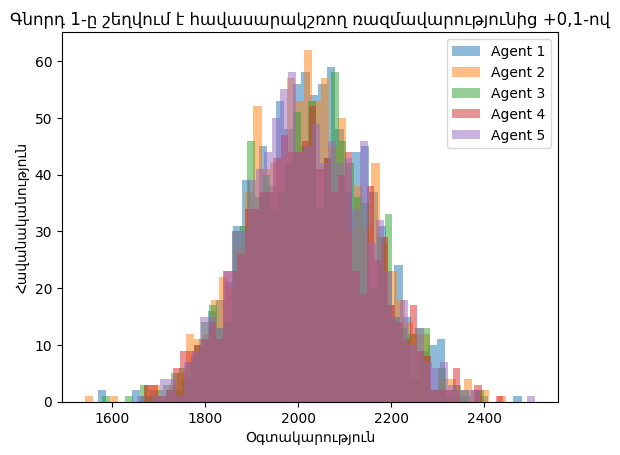

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Parameters
n_agents = 5  # Number of agents
n_simulations = 1000  # Number of simulations
theta_max = 100  # Maximum value for theta

# Define bidding strategies for each agent
bidding_strategies = [0.85, 0.85, 0.85, 0.85, 0.85]  # Define your custom strategies here

# Initialize lists to store results
utility_sums = {f'u{i}_sum': [] for i in range(1, n_agents + 1)}
utility_means = {f'u{i}_mean': [] for i in range(1, n_agents + 1)}
utility_stds = {f'u{i}_std': [] for i in range(1, n_agents + 1)}
seller_mean_per_round = []

# Run the simulation multiple times
for _ in range(n_simulations):
    # Generate new theta values for each agent
    thetas = [np.round(stats.norm.rvs(50, 15, size=1000), 2) for _ in range(n_agents)]

    # Calculate bids based on each agent's custom bidding strategy
    bids = [theta * bidding_strategies[i] for i, theta in enumerate(thetas)]

    # Create DataFrame for this iteration
    df = pd.DataFrame({f'theta{i+1}': thetas[i] for i in range(n_agents)})
    for i in range(n_agents):
        df[f'bid{i+1}'] = bids[i]

    # Determine the winning bid and calculate utilities
    max_bid = df[[f'bid{i+1}' for i in range(n_agents)]].max(axis=1)
    for i in range(n_agents):
        df[f'u{i+1}'] = np.where(df[f'bid{i+1}'] == max_bid, df[f'theta{i+1}'] - df[f'bid{i+1}'], 0)

    # Calculate seller's mean utility per auction (average winning bid) for this simulation
    seller_mean_per_round.append(max_bid.sum())

    # Append sums, means, and stds of utilities for each agent
    for i in range(n_agents):
        utility_sums[f'u{i+1}_sum'].append(df[f'u{i+1}'].sum())
        utility_means[f'u{i+1}_mean'].append(df[f'u{i+1}'].mean())
        utility_stds[f'u{i+1}_std'].append(df[f'u{i+1}'].std())

# Store results in a DataFrame
simulation_results = pd.DataFrame({**utility_sums, **utility_means, **utility_stds, "seller_mean_utility_per_round": seller_mean_per_round})

# Display the first few rows of the results
print(simulation_results.head())

# Summary statistics
for i in range(n_agents):
    print(f"Agent {i+1} - Utility Mean:", simulation_results[f'u{i+1}_mean'].mean())
    print(f"Agent {i+1} - Utility Std Dev:", simulation_results[f'u{i+1}_mean'].std())

# Seller's mean utility across all simulations
print("Seller - Overall Mean Utility Per Round:", simulation_results["seller_mean_utility_per_round"].mean())
print("Seller - Utility Std Dev Per Round:", simulation_results["seller_mean_utility_per_round"].std())

# Plot histograms for utility sums of each agent
for i in range(n_agents):
    plt.hist(simulation_results[f'u{i+1}_sum'], bins=50, alpha=0.5, label=f'Agent {i+1}')
plt.legend()
plt.title("Գնորդ 1-ը շեղվում է հավասարակշռող ռազմավարությունից +0,1-ով")
plt.xlabel("Օգտակարություն")
plt.ylabel("Հավանականություն")
plt.show()


In [ ]:
# Perform pairwise t-tests between agents
for i in range(n_agents):
    for j in range(i+1, n_agents):
        t_stat, p_val = stats.ttest_ind(simulation_results[f'u{i+1}_sum'], simulation_results[f'u{j+1}_sum'])
        print(f"T-test between Agent {i+1} and Agent {j+1}: t-stat = {t_stat}, p-value = {round(p_val,2)}")

T-test between Agent 1 and Agent 2: t-stat = -7.007000879345717, p-value = 0.0
T-test between Agent 1 and Agent 3: t-stat = -5.882238795233815, p-value = 0.0
T-test between Agent 1 and Agent 4: t-stat = -8.290332675393682, p-value = 0.0
T-test between Agent 1 and Agent 5: t-stat = -7.400635840365219, p-value = 0.0
T-test between Agent 2 and Agent 3: t-stat = 1.1386726632048563, p-value = 0.25
T-test between Agent 2 and Agent 4: t-stat = -1.2213521338496132, p-value = 0.22
T-test between Agent 2 and Agent 5: t-stat = -0.34298480128210396, p-value = 0.73
T-test between Agent 3 and Agent 4: t-stat = -2.371347509866272, p-value = 0.02
T-test between Agent 3 and Agent 5: t-stat = -1.489756831866496, p-value = 0.14
T-test between Agent 4 and Agent 5: t-stat = 0.8834864905614246, p-value = 0.38
